In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud, ImageColorGenerator
from collections import defaultdict
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
import seaborn as sns
import string
import plotly.figure_factory as ff
import random

In [3]:
df = pd.read_csv('training_data.csv')

In [4]:
df.head()

,less_toxic,more_toxic,score
0,I really couldn't give a fuck if i'm blocked x...,"""\n\nYOUR MOM IS SO FAT, SHE GETS CASHBACK WHE...",0.6
1,The Glue Theory \n\nI hate you and your ugly d...,"""\n\n FUCK YOU \nFUCK YOU!!! YOU'RE A STUPID ...",0.6
2,"""\n\nSorry, no? """"No"""" is what a master says ...",why don't you suck my ass until your lips blee...,0.6
3,Fk Off==\nFk off you Dragon Ball nerd. You lik...,honestly ==\nyou need to crawl under a rock an...,0.5
4,Can I Just Be Terminated. This Is Bullshit.,I am going to kill you \n\ni am going to get ...,0.5


In [5]:
df["less_toxic"] = df['less_toxic'].apply(
    lambda x: ' '.join([w for w in str(x).lower().split()])
)

df["more_toxic"] = df['more_toxic'].apply(
    lambda x: ' '.join([w for w in str(x).lower().split()])
)

In [7]:
df.head()

,less_toxic,more_toxic,score
0,i really couldn't give a fuck if i'm blocked x...,""" your mom is so fat, she gets cashback when s...",0.6
1,the glue theory i hate you and your ugly dog. ...,""" fuck you fuck you!!! you're a stupid nigger ...",0.6
2,""" sorry, no? """"no"""" is what a master says to a...",why don't you suck my ass until your lips blee...,0.6
3,fk off== fk off you dragon ball nerd. you like...,honestly == you need to crawl under a rock and...,0.5
4,can i just be terminated. this is bullshit.,i am going to kill you i am going to get a gun...,0.5


In [8]:
df["less_toxic"] = df["less_toxic"].str.replace('fk', 'fuck')
df["less_toxic"] = df["less_toxic"].str.replace('fuk', 'fuck')

In [14]:
less_toxic_df = pd.DataFrame()
less_toxic_df['comment'] = df['less_toxic']
less_toxic_df['target'] = len(df['less_toxic'])*[0]

In [15]:
more_toxic_df = pd.DataFrame()
more_toxic_df['comment'] = df['more_toxic']
more_toxic_df['target'] = len(df['more_toxic'])*[1]

In [17]:
final_df = final_df.sample(frac=0.1, random_state=2).reset_index(drop=True)

In [18]:
final_df.head()

,comment,target
0,you are a no good phoney all your articles are...,0
1,yeh well ban me fukkers fuck you morons,1
2,wouldn't be the first time bitch. fuck you i'l...,1
3,2012 (utc) the fact that you're a dick probabl...,0
4,you are a son of bitch turk just to let you kn...,1


In [25]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [27]:
df = final_df

In [29]:
df.columns

Index(['comment', 'target'], dtype='object')

In [30]:
df['target']=encoder.fit_transform(df['target'])

In [31]:
df.head()

,comment,target
0,you are a no good phoney all your articles are...,0
1,yeh well ban me fukkers fuck you morons,1
2,wouldn't be the first time bitch. fuck you i'l...,1
3,2012 (utc) the fact that you're a dick probabl...,0
4,you are a son of bitch turk just to let you kn...,1


In [32]:
df.isnull().sum()

comment    0
target     0
dtype: int64

In [36]:
df['target'].value_counts()

1    575
0    562
Name: target, dtype: int64

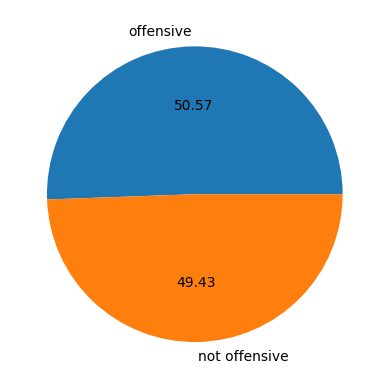

In [38]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['offensive','not offensive'],autopct='%0.2f')
plt.show()

In [45]:
import nltk

In [46]:
nltk.download

<bound method Downloader.download of <nltk.downloader.Downloader object at 0x783d308ea7a0>>

In [41]:
df['num_characters']=df['comment'].apply(len)

In [42]:
df

,comment,target,num_characters
0,you are a no good phoney all your articles are...,0,590
1,yeh well ban me fukkers fuck you morons,1,39
2,wouldn't be the first time bitch. fuck you i'l...,1,150
3,2012 (utc) the fact that you're a dick probabl...,0,100
4,you are a son of bitch turk just to let you kn...,1,353
...,...,...,...
1132,get a life you animal fucker shut up you fucki...,1,146
1133,blah blah blah blah. stay off my talk page. do...,0,208
1134,"last warning once again, don't give a fuck mr ...",1,661
1135,thanks for reverting a good change on the zola...,0,229


In [48]:
nltk.download('punkt')
df['num_words']=df['comment'].apply(lambda x: len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [49]:
df.head()

,comment,target,num_characters,num_words
0,you are a no good phoney all your articles are...,0,590,118
1,yeh well ban me fukkers fuck you morons,1,39,8
2,wouldn't be the first time bitch. fuck you i'l...,1,150,34
3,2012 (utc) the fact that you're a dick probabl...,0,100,23
4,you are a son of bitch turk just to let you kn...,1,353,69


In [50]:
df['num_sentences']=df['comment'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [51]:
df.head()

,comment,target,num_characters,num_words,num_sentences
0,you are a no good phoney all your articles are...,0,590,118,7
1,yeh well ban me fukkers fuck you morons,1,39,8,1
2,wouldn't be the first time bitch. fuck you i'l...,1,150,34,3
3,2012 (utc) the fact that you're a dick probabl...,0,100,23,2
4,you are a son of bitch turk just to let you kn...,1,353,69,3


In [52]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1137.000000,1137.000000,1137.000000
mean,376.109938,77.255937,4.797713
std,885.971523,178.983044,17.968318
min,18.000000,2.000000,1.000000
25%,52.000000,12.000000,1.000000
50%,105.000000,23.000000,2.000000
75%,240.000000,54.000000,3.000000
max,5000.000000,1664.000000,277.000000


In [53]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,562.000000,562.000000,562.000000
mean,297.854093,63.517794,4.284698
std,611.018075,125.045477,11.656128
min,19.000000,2.000000,1.000000
25%,60.250000,14.250000,1.000000
50%,129.000000,28.000000,2.000000
75%,271.000000,60.000000,4.000000
max,5000.000000,1101.000000,201.000000


In [54]:
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,575.000000,575.000000,575.000000
mean,452.596522,90.683478,5.299130
std,1084.775160,218.523452,22.487184
min,18.000000,4.000000,1.000000
25%,45.500000,10.000000,1.000000
50%,87.000000,20.000000,2.000000
75%,217.000000,48.000000,3.000000
max,5000.000000,1664.000000,277.000000


In [55]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [56]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Dancing')

'danc'

In [59]:
df['transformed_text']=df['comment'].apply(transform_text)

In [60]:
df.head()

,comment,target,num_characters,num_words,num_sentences,transformed_text
0,you are a no good phoney all your articles are...,0,590,118,7,good phoney articl covert pov editor 100 right...
1,yeh well ban me fukkers fuck you morons,1,39,8,1,yeh well ban fukker fuck moron
2,wouldn't be the first time bitch. fuck you i'l...,1,150,34,3,would first time bitch fuck find live sodom wi...
3,2012 (utc) the fact that you're a dick probabl...,0,100,23,2,2012 utc fact dick probabl help either 4 novemb
4,you are a son of bitch turk just to let you kn...,1,353,69,3,son bitch turk let know know noth azari irania...


In [61]:
pip install wordcloud

In [62]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500, min_font_size=10,background_color='white')

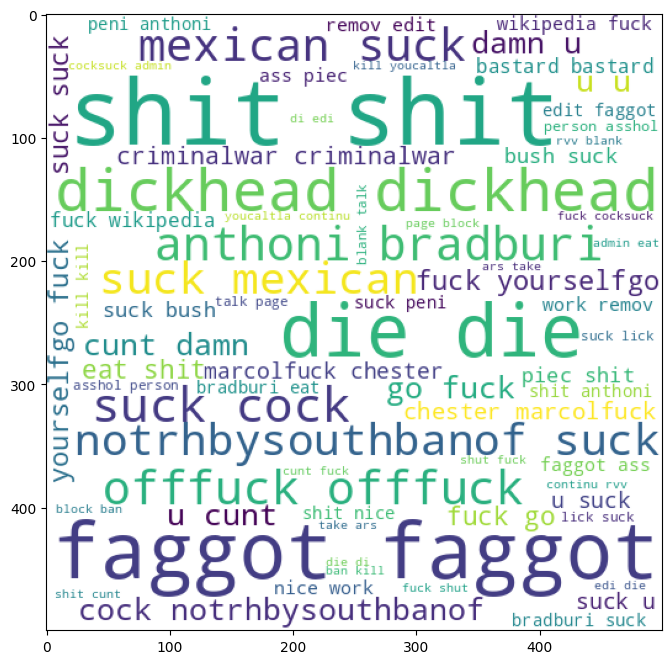

In [67]:
offensive_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(12, 8))
plt.imshow(offensive_wc)

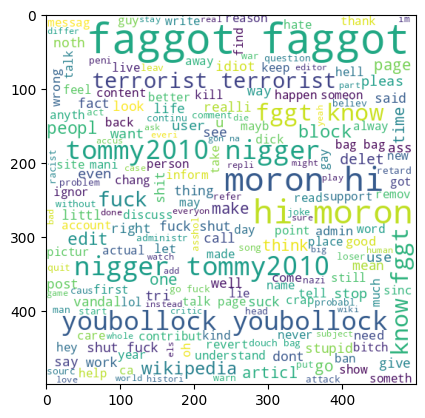

In [68]:
not_offensive_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(not_offensive_wc)

In [85]:
df['target'].value_counts()

1    575
0    562
Name: target, dtype: int64

In [95]:
for i in range(len(df)):
    if ('faggot' in df.iloc[i]['comment']) or ('nigger' in df.iloc[i]['comment']) or ('dick' in df.iloc[i]['comment']) or ('terrorist' in df.iloc[i]['comment']):
        if df.iloc[i]['target'] == 0:
            df.at[i, 'target'] = 1

In [96]:
df['target'].value_counts()

1    760
0    377
Name: target, dtype: int64

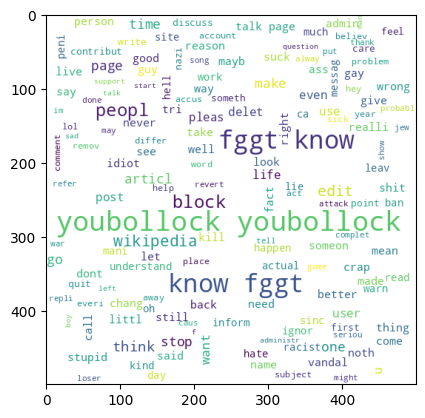

In [97]:
not_offensive_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(not_offensive_wc)

In [98]:
offensive_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        offensive_corpus.append(word)

In [ ]:
offensive_corpus

In [101]:
len(offensive_corpus)

33539

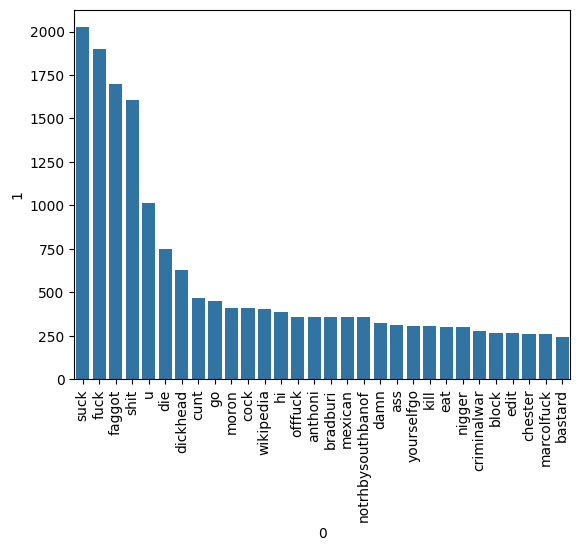

In [103]:
from collections import Counter
a=pd.DataFrame(Counter(offensive_corpus).most_common(30))
sns.barplot(x=a[0],y=a[1])
plt.xticks(rotation='vertical')
plt.show()

In [104]:
not_offensive_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        not_offensive_corpus.append(word)

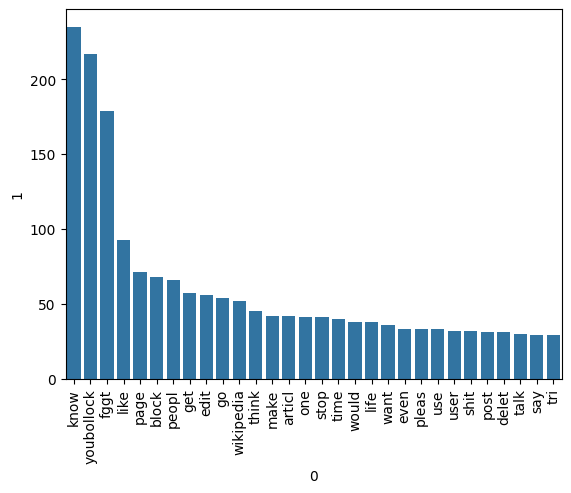

In [105]:
a=pd.DataFrame(Counter(not_offensive_corpus).most_common(30))
sns.barplot(x=a[0],y=a[1])
plt.xticks(rotation='vertical')
plt.show()

In [139]:
df

,comment,target,num_characters,num_words,num_sentences,transformed_text
0,you are a no good phoney all your articles are...,1,590,118,7,good phoney articl covert pov editor 100 right...
1,yeh well ban me fukkers fuck you morons,1,39,8,1,yeh well ban fukker fuck moron
2,wouldn't be the first time bitch. fuck you i'l...,1,150,34,3,would first time bitch fuck find live sodom wi...
3,2012 (utc) the fact that you're a dick probabl...,1,100,23,2,2012 utc fact dick probabl help either 4 novemb
4,you are a son of bitch turk just to let you kn...,1,353,69,3,son bitch turk let know know noth azari irania...
...,...,...,...,...,...,...
1132,get a life you animal fucker shut up you fucki...,1,146,30,3,get life anim fucker shut fuck nigger fuck shi...
1133,blah blah blah blah. stay off my talk page. do...,0,208,46,6,blah blah blah blah stay talk page dont look t...
1134,"last warning once again, don't give a fuck mr ...",1,661,138,7,last warn give fuck mr dumbass serious peopl e...
1135,thanks for reverting a good change on the zola...,1,229,50,4,thank revert good chang zola jesu page know ni...


In [106]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [140]:
X = cv.fit_transform(df['transformed_text']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [108]:
X.shape

(1137, 4347)

In [109]:
y = df['target'].values
y

array([1, 1, 1, ..., 1, 1, 1])

In [111]:
df['target'].value_counts()

1    760
0    377
Name: target, dtype: int64

In [110]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [113]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [114]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [115]:
gnb.fit(X_train, Y_train)
y_pred1 = gnb.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred1)}\n")
print(f"confusion : {confusion_matrix(Y_test, y_pred1)}\n")
print(f"precision: {precision_score(Y_test, y_pred1)}\n")

Accuracy: 0.7412280701754386

confusion : [[ 48  27]
 [ 32 121]]

precision: 0.8175675675675675



In [116]:
mnb.fit(X_train, Y_train)
y_pred2 = mnb.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred2)}\n")
print(f"confusion : {confusion_matrix(Y_test, y_pred2)}\n")
print(f"precision: {precision_score(Y_test, y_pred2)}\n")

Accuracy: 0.75

confusion : [[ 64  11]
 [ 46 107]]

precision: 0.9067796610169492



In [117]:
bnb.fit(X_train, Y_train)
y_pred3 = bnb.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred3)}\n")
print(f"confusion : {confusion_matrix(Y_test, y_pred3)}\n")
print(f"precision: {precision_score(Y_test, y_pred3)}\n")

Accuracy: 0.6929824561403509

confusion : [[ 14  61]
 [  9 144]]

precision: 0.7024390243902439



In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [119]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(1137, 4347)

In [120]:
Y = df['target'].values

In [121]:
X_train_2, X_test_2, Y_train_2, Y_test_2 = train_test_split(X, Y, test_size=0.2, random_state=2)

In [122]:
gnb1 = GaussianNB()
mnb1 = MultinomialNB()
bnb1 = BernoulliNB()

In [123]:
gnb1.fit(X_train_2, Y_train_2)
y_pred_2_1 = gnb1.predict(X_test_2)
print(f"1) Accuracy: {accuracy_score(Y_test_2, y_pred_2_1)}\n")
print(f"confusion : {confusion_matrix(Y_test_2, y_pred_2_1)}\n")
print(f"precision: {precision_score(Y_test_2, y_pred_2_1)}\n\n\n")


mnb1.fit(X_train_2, Y_train_2)
y_pred_2_2 = mnb1.predict(X_test_2)
print(f"2) Accuracy: {accuracy_score(Y_test_2, y_pred_2_2)}\n")
print(f"confusion : {confusion_matrix(Y_test_2, y_pred_2_2)}\n")
print(f"precision: {precision_score(Y_test_2, y_pred_2_2)}\n\n\n")

bnb1.fit(X_train_2, Y_train_2)
y_pred_2_3 = bnb1.predict(X_test_2)
print(f"3) Accuracy: {accuracy_score(Y_test_2, y_pred_2_3)}\n")
print(f"confusion : {confusion_matrix(Y_test_2, y_pred_2_3)}\n")
print(f"precision: {precision_score(Y_test_2, y_pred_2_3)}\n\n\n")


1) Accuracy: 0.7192982456140351

confusion : [[ 46  29]
 [ 35 118]]

precision: 0.8027210884353742



2) Accuracy: 0.6842105263157895

confusion : [[  3  72]
 [  0 153]]

precision: 0.68



3) Accuracy: 0.6929824561403509

confusion : [[ 14  61]
 [  9 144]]

precision: 0.7024390243902439





In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [125]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [126]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [127]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [129]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [130]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.8245614035087719, 0.8741721854304636)

In [131]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8245614035087719
Precision -  0.8741721854304636
For  KN
Accuracy -  0.6710526315789473
Precision -  0.6710526315789473
For  NB
Accuracy -  0.7149122807017544
Precision -  0.7037037037037037
For  DT
Accuracy -  0.8070175438596491
Precision -  0.9739130434782609
For  LR
Accuracy -  0.8333333333333334
Precision -  0.952755905511811
For  RF
Accuracy -  0.7763157894736842
Precision -  0.7771739130434783
For  AdaBoost
Accuracy -  0.8508771929824561
Precision -  0.9219858156028369
For  BgC
Accuracy -  0.8421052631578947
Precision -  0.8421052631578947
For  ETC
Accuracy -  0.7719298245614035
Precision -  0.7853107344632768
For  GBDT
Accuracy -  0.8508771929824561
Precision -  0.9612403100775194
For  xgb
Accuracy -  0.8596491228070176
Precision -  0.9290780141843972


In [132]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [133]:
performance_df

,Algorithm,Accuracy,Precision
3,DT,0.807018,0.973913
9,GBDT,0.850877,0.961240
4,LR,0.833333,0.952756
10,xgb,0.859649,0.929078
6,AdaBoost,0.850877,0.921986
0,SVC,0.824561,0.874172
7,BgC,0.842105,0.842105
8,ETC,0.771930,0.785311
5,RF,0.776316,0.777174
2,NB,0.714912,0.703704


In [135]:
# Voting Classifier

from sklearn.ensemble import VotingClassifier

voting = VotingClassifier(estimators=[('xgb', xgb), ('abc', abc), ('gbdt', gbdt)],voting='soft')

voting.fit(X_train,y_train)

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.8552631578947368
Precision 0.9347826086956522


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))